In [19]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

from scipy import stats

import seaborn as sns
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

In [20]:
df_OPA= pd.read_csv(r'C:\Users\user\OneDrive\Desktop\CIS 9660 Group Project\Open_Restaurant_Applications.csv')

In [253]:
df_RI=pd.read_csv(r'C:\Users\user\OneDrive\Desktop\CIS 9660 Group Project\Rodent_Inspection.csv')

In [55]:
#df_OPA.head(10)

In [22]:
df_OPA.shape # Analysis in other file 

(12257, 35)

In [250]:
df_RI.shape 

(1916105, 20)

In [251]:
df_RI.head(5)

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,13186061,7644998,1,4035770010,4,3577,10,NaN,NaN,11385.0,NaN,NaN,NaN,NaN,Queens,09/23/2020 12:10:39 PM,Rat Activity,09/28/2020 12:07:03 PM,NaN
1,Initial,13185535,7644433,1,3031370001,3,3137,1,NaN,NaN,11206.0,NaN,NaN,NaN,NaN,Brooklyn,09/22/2020 09:43:43 AM,Failed for Other R,09/28/2020 10:55:37 PM,NaN
2,Initial,13185270,7644376,1,4115520091,4,11552,91,NaN,NaN,11417.0,NaN,NaN,NaN,NaN,Queens,09/22/2020 08:34:00 AM,Failed for Other R,09/28/2020 01:09:16 PM,NaN
3,Initial,13185931,7644978,1,3033160032,3,3316,32,NaN,NaN,11237.0,NaN,NaN,NaN,NaN,Brooklyn,09/23/2020 10:31:32 AM,Passed,09/28/2020 10:55:25 PM,NaN
4,Initial,13186672,7644397,1,3031870055,3,3187,55,131,STARR STREET,11237.0,1005046.0,195490.0,40.70322,-73.924996,Brooklyn,09/28/2020 01:07:05 PM,Rat Activity,09/28/2020 10:54:48 PM,"(40.703220245028, -73.924996432938)"


In [24]:
names=df_RI.columns
names

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

In [ ]:
#BBL: Borough, Block, and Lot code, which is a unique identifier of NYC Taxlots. 
# Every NYC property has its own BBL code, and inspections are conducted at the taxlot level. 
# This dataset can be mapped by joining these inspectional results to a taxlot geography file 
# such as the Department of City Planning’s PLUTO dataset.

In [ ]:
# Result of the inspection, including: Active Rat Signs (ARS) - ARS include any of six different signs: 
# 1) fresh tracks, 2) fresh droppings, 3) active burrows, 4) active runways and rub marks, 5) fresh gnawing marks, 
# and 6) live rats. Problem Conditions - Problem conditions include garbage 
# (poor containerization of food waste resulting in the feeding of rats), 
# harborage (clutter and dense vegetation promoting the nesting of rats), and mice.

In [252]:
df_RI.isnull().sum()

INSPECTION_TYPE                    0
JOB_TICKET_OR_WORK_ORDER_ID        0
JOB_ID                             0
JOB_PROGRESS                       0
BBL                                0
BORO_CODE                          0
BLOCK                              0
LOT                                0
HOUSE_NUMBER                   46219
STREET_NAME                     3041
ZIP_CODE                       10193
X_COORD                        59905
Y_COORD                        59905
LATITUDE                        3640
LONGITUDE                       3640
BOROUGH                            0
INSPECTION_DATE                   17
RESULT                             6
APPROVED_DATE                    131
LOCATION                        4270
dtype: int64

In [ ]:
#Drop NA and select needed column 

In [257]:
nan_value = float("NaN")
df_RI.replace("", nan_value, inplace=True)

df_RI.dropna(subset = ['INSPECTION_TYPE','LATITUDE','LONGITUDE','LOCATION','BOROUGH','INSPECTION_DATE','RESULT'], inplace=True)


In [258]:
df_RI.isnull().sum()

INSPECTION_TYPE                    0
JOB_TICKET_OR_WORK_ORDER_ID        0
JOB_ID                             0
JOB_PROGRESS                       0
BBL                                0
BORO_CODE                          0
BLOCK                              0
LOT                                0
HOUSE_NUMBER                   43091
STREET_NAME                     1083
ZIP_CODE                        9634
X_COORD                        57631
Y_COORD                        57631
LATITUDE                           0
LONGITUDE                          0
BOROUGH                            0
INSPECTION_DATE                    0
RESULT                             0
APPROVED_DATE                    125
LOCATION                           0
dtype: int64

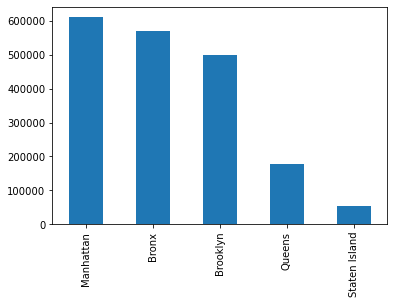

Manhattan        611560
Bronx            571928
Brooklyn         498350
Queens           176320
Staten Island     53654
Name: BOROUGH, dtype: int64

In [259]:
df_RI['BOROUGH'].value_counts().plot(kind='bar')
plt.show()
region_inspection_count=df_RI['BOROUGH'].value_counts()
region_inspection_count

In [261]:
selected=['INSPECTION_TYPE','LATITUDE','LONGITUDE','BOROUGH','INSPECTION_DATE','RESULT']

In [262]:
df_data= df_RI[selected]
df_data

,INSPECTION_TYPE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT
4,Initial,40.703220,-73.924996,Brooklyn,09/28/2020 01:07:05 PM,Rat Activity
5,Initial,40.702240,-73.915905,Brooklyn,09/23/2020 11:50:34 AM,Passed
6,Initial,40.700089,-73.930388,Brooklyn,09/21/2020 12:55:00 PM,Passed
7,Initial,40.701239,-73.918316,Brooklyn,09/23/2020 10:44:22 AM,Rat Activity
8,Initial,40.733626,-73.986920,Manhattan,09/25/2020 08:25:04 AM,Passed
...,...,...,...,...,...,...
1916099,STOPPAGE,40.796942,-73.961513,Manhattan,12/01/2020 05:10:00 PM,Stoppage done
1916100,Initial,40.622008,-74.001117,Brooklyn,04/01/2021 01:19:40 PM,Passed
1916101,Initial,40.828916,-73.924092,Bronx,04/05/2021 12:30:00 PM,Passed
1916102,Initial,40.778412,-73.955169,Manhattan,04/02/2021 12:00:52 PM,Failed for Other R


In [53]:
Rodent_Active=df_data[df_data["RESULT"]=='Rat Activity']
Rodent_Active

,INSPECTION_TYPE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT
4,Initial,40.703220,-73.924996,Brooklyn,09/28/2020 01:07:05 PM,Rat Activity
7,Initial,40.701239,-73.918316,Brooklyn,09/23/2020 10:44:22 AM,Rat Activity
10,Initial,40.858339,-73.908889,Bronx,09/21/2020 08:53:14 AM,Rat Activity
11,Initial,40.695591,-73.926318,Brooklyn,09/28/2020 03:08:05 PM,Rat Activity
12,Initial,40.679371,-73.949597,Brooklyn,09/18/2020 09:46:55 AM,Rat Activity
...,...,...,...,...,...,...
1916075,Initial,40.774013,-73.950598,Manhattan,04/02/2021 10:30:52 AM,Rat Activity
1916076,Initial,40.723351,-73.980782,Manhattan,04/05/2021 09:51:54 AM,Rat Activity
1916081,Initial,40.723664,-73.979699,Manhattan,04/05/2021 10:06:54 AM,Rat Activity
1916082,Initial,40.692173,-73.944280,Brooklyn,04/06/2021 02:49:31 PM,Rat Activity


In [38]:
Rodent_Active.to_csv('Rodent_Active_Data.csv')

In [52]:
location=['LATITUDE','LONGITUDE','LOCATION']

In [54]:
df_loc=df_data[location]
df_loc

,LATITUDE,LONGITUDE,LOCATION
4,40.703220,-73.924996,"(40.703220245028, -73.924996432938)"
5,40.702240,-73.915905,"(40.702239543651, -73.915905347074)"
6,40.700089,-73.930388,"(40.700089115304, -73.930388027959)"
7,40.701239,-73.918316,"(40.701239444252, -73.918315774136)"
8,40.733626,-73.986920,"(40.733625865925, -73.986919963388)"
...,...,...,...
1916099,40.796942,-73.961513,"(40.796941707025, -73.961513392354)"
1916100,40.622008,-74.001117,"(40.622007575952, -74.001116690869)"
1916101,40.828916,-73.924092,"(40.82891581918, -73.924091755534)"
1916102,40.778412,-73.955169,"(40.778412330727, -73.955169271437)"


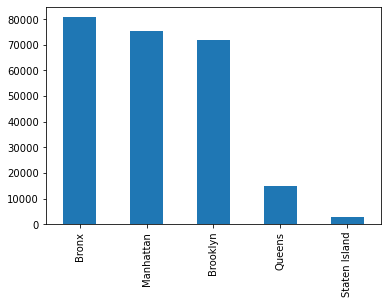

Bronx            80777
Manhattan        75285
Brooklyn         71978
Queens           14741
Staten Island     2796
Name: BOROUGH, dtype: int64

In [49]:
df_RI[df_RI["RESULT"]=='Rat Activity']['BOROUGH'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_RI[df_RI["RESULT"]=='Rat Activity']['BOROUGH'].value_counts()
region_activity_count

In [63]:
borough_count=df_RI['BOROUGH'].value_counts()
borough_count

Manhattan        612621
Bronx            572983
Brooklyn         499545
Queens           177067
Staten Island     53889
Name: BOROUGH, dtype: int64

Bronx            0.141301
Brooklyn         0.145032
Manhattan        0.123417
Queens           0.085262
Staten Island    0.052200
Name: BOROUGH, dtype: float64

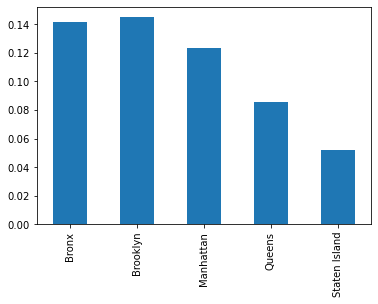

In [74]:
Rat_activity_rate=region_activity_count/borough_count
Rat_activity_rate.plot(kind='bar')
Rat_activity_rate

In [65]:
df_RI['RESULT'].value_counts()

Passed                1195180
Bait applied           248144
Rat Activity           246931
Failed for Other R     191456
Monitoring visit        32614
Cleanup done             1564
Stoppage done             210
Name: RESULT, dtype: int64

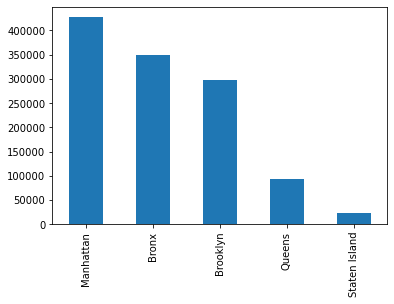

Manhattan        427672
Bronx            349894
Brooklyn         298474
Queens            94172
Staten Island     23026
Name: BOROUGH, dtype: int64

In [160]:
df_RI[df_RI["RESULT"]=='Passed']['BOROUGH'].value_counts().plot(kind='bar')
plt.show()
region_activity_count=df_RI[df_RI["RESULT"]=='Passed']['BOROUGH'].value_counts()
region_activity_count

In [54]:
Rodent_Active

,INSPECTION_TYPE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT
4,Initial,40.703220,-73.924996,Brooklyn,09/28/2020 01:07:05 PM,Rat Activity
7,Initial,40.701239,-73.918316,Brooklyn,09/23/2020 10:44:22 AM,Rat Activity
10,Initial,40.858339,-73.908889,Bronx,09/21/2020 08:53:14 AM,Rat Activity
11,Initial,40.695591,-73.926318,Brooklyn,09/28/2020 03:08:05 PM,Rat Activity
12,Initial,40.679371,-73.949597,Brooklyn,09/18/2020 09:46:55 AM,Rat Activity
...,...,...,...,...,...,...
1916075,Initial,40.774013,-73.950598,Manhattan,04/02/2021 10:30:52 AM,Rat Activity
1916076,Initial,40.723351,-73.980782,Manhattan,04/05/2021 09:51:54 AM,Rat Activity
1916081,Initial,40.723664,-73.979699,Manhattan,04/05/2021 10:06:54 AM,Rat Activity
1916082,Initial,40.692173,-73.944280,Brooklyn,04/06/2021 02:49:31 PM,Rat Activity


In [263]:
df_data

,INSPECTION_TYPE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT
4,Initial,40.703220,-73.924996,Brooklyn,09/28/2020 01:07:05 PM,Rat Activity
5,Initial,40.702240,-73.915905,Brooklyn,09/23/2020 11:50:34 AM,Passed
6,Initial,40.700089,-73.930388,Brooklyn,09/21/2020 12:55:00 PM,Passed
7,Initial,40.701239,-73.918316,Brooklyn,09/23/2020 10:44:22 AM,Rat Activity
8,Initial,40.733626,-73.986920,Manhattan,09/25/2020 08:25:04 AM,Passed
...,...,...,...,...,...,...
1916099,STOPPAGE,40.796942,-73.961513,Manhattan,12/01/2020 05:10:00 PM,Stoppage done
1916100,Initial,40.622008,-74.001117,Brooklyn,04/01/2021 01:19:40 PM,Passed
1916101,Initial,40.828916,-73.924092,Bronx,04/05/2021 12:30:00 PM,Passed
1916102,Initial,40.778412,-73.955169,Manhattan,04/02/2021 12:00:52 PM,Failed for Other R


In [272]:
All_inspection_date = df_data[["INSPECTION_DATE"]]
All_inspection_date

,INSPECTION_DATE
4,09/28/2020 01:07:05 PM
5,09/23/2020 11:50:34 AM
6,09/21/2020 12:55:00 PM
7,09/23/2020 10:44:22 AM
8,09/25/2020 08:25:04 AM
...,...
1916099,12/01/2020 05:10:00 PM
1916100,04/01/2021 01:19:40 PM
1916101,04/05/2021 12:30:00 PM
1916102,04/02/2021 12:00:52 PM


In [284]:
month_mapper = {'01':"January", '02':'February', '03':'March', '04':'April', '05':'May', '06':'June', '07':'July', '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'}
month_mapper

{'01': 'January',
 '02': 'February',
 '03': 'March',
 '04': 'April',
 '05': 'May',
 '06': 'June',
 '07': 'July',
 '08': 'August',
 '09': 'September',
 '10': 'October',
 '11': 'November',
 '12': 'December'}

In [268]:
assert set(month_mapper.values()) == {"January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"}


In [286]:
All_inspection_date = Rodent_Active_date['Month'].value_counts()
All_inspection_date

March        23598
April        22951
October      21912
August       21109
September    21007
June         20461
May          20448
July         19454
February     19187
December     18983
November     18348
January      18119
Name: Month, dtype: int64

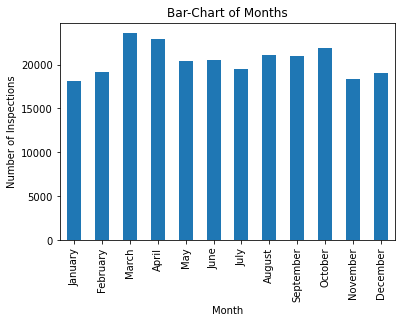

In [287]:
All_inspection_date = All_inspection_date[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]
All_inspection_date.plot(kind = "bar")

plt.xlabel("Month")
plt.ylabel("Number of Inspections")
plt.title("Bar-Chart of Months");

axis_32 = plt.gca()

In [288]:
All_inspection_date = df_data[["INSPECTION_DATE"]]
All_inspection_date

,INSPECTION_DATE
4,09/28/2020 01:07:05 PM
5,09/23/2020 11:50:34 AM
6,09/21/2020 12:55:00 PM
7,09/23/2020 10:44:22 AM
8,09/25/2020 08:25:04 AM
...,...
1916099,12/01/2020 05:10:00 PM
1916100,04/01/2021 01:19:40 PM
1916101,04/05/2021 12:30:00 PM
1916102,04/02/2021 12:00:52 PM


In [282]:
def extract_month(entry):
    entry = str(entry)
    return entry.split("/")[0] 

All_inspection_date["Month"] = All_inspection_date["INSPECTION_DATE"].apply(extract_month)
All_inspection_date

<ipython-input-282-488d5a610f83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_inspection_date["Month"] = All_inspection_date["INSPECTION_DATE"].apply(extract_month)


,INSPECTION_DATE,Month
4,09/28/2020 01:07:05 PM,09
5,09/23/2020 11:50:34 AM,09
6,09/21/2020 12:55:00 PM,09
7,09/23/2020 10:44:22 AM,09
8,09/25/2020 08:25:04 AM,09
...,...,...
1916099,12/01/2020 05:10:00 PM,12
1916100,04/01/2021 01:19:40 PM,04
1916101,04/05/2021 12:30:00 PM,04
1916102,04/02/2021 12:00:52 PM,04


In [73]:
Rodent_Active_date = Rodent_Active[["INSPECTION_DATE"]]
Rodent_Active_date

,INSPECTION_DATE
4,09/28/2020 01:07:05 PM
7,09/23/2020 10:44:22 AM
10,09/21/2020 08:53:14 AM
11,09/28/2020 03:08:05 PM
12,09/18/2020 09:46:55 AM
...,...
1916075,04/02/2021 10:30:52 AM
1916076,04/05/2021 09:51:54 AM
1916081,04/05/2021 10:06:54 AM
1916082,04/06/2021 02:49:31 PM


In [74]:
def extract_month(entry):
    entry = str(entry)
    return entry.split("/")[0] 

Rodent_Active_date["Month"] = Rodent_Active_date["INSPECTION_DATE"].apply(extract_month)
Rodent_Active_date

<ipython-input-74-d7964b28ac84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rodent_Active_date["Month"] = Rodent_Active_date["INSPECTION_DATE"].apply(extract_month)


,INSPECTION_DATE,Month
4,09/28/2020 01:07:05 PM,09
7,09/23/2020 10:44:22 AM,09
10,09/21/2020 08:53:14 AM,09
11,09/28/2020 03:08:05 PM,09
12,09/18/2020 09:46:55 AM,09
...,...,...
1916075,04/02/2021 10:30:52 AM,04
1916076,04/05/2021 09:51:54 AM,04
1916081,04/05/2021 10:06:54 AM,04
1916082,04/06/2021 02:49:31 PM,04


In [75]:
month_mapper = {'01':"January", '02':'February', '03':'March', '04':'April', '05':'May', '06':'June', '07':'July', '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'}
month_mapper

{'01': 'January',
 '02': 'February',
 '03': 'March',
 '04': 'April',
 '05': 'May',
 '06': 'June',
 '07': 'July',
 '08': 'August',
 '09': 'September',
 '10': 'October',
 '11': 'November',
 '12': 'December'}

In [76]:
assert set(month_mapper.values()) == {"January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"}


In [222]:
Rodent_Active_date["Month"] = Rodent_Active_date["Month"].replace(month_mapper) 
Rodent_Active_date

<ipython-input-222-b0c60aa381b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rodent_Active_date["Month"] = Rodent_Active_date["Month"].replace(month_mapper)


,INSPECTION_DATE,Month
4,09/28/2020 01:07:05 PM,September
7,09/23/2020 10:44:22 AM,September
10,09/21/2020 08:53:14 AM,September
11,09/28/2020 03:08:05 PM,September
12,09/18/2020 09:46:55 AM,September
...,...,...
1916075,04/02/2021 10:30:52 AM,April
1916076,04/05/2021 09:51:54 AM,April
1916081,04/05/2021 10:06:54 AM,April
1916082,04/06/2021 02:49:31 PM,April


In [223]:
active_number_by_months = Rodent_Active_date['Month'].value_counts()
active_number_by_months

March        23598
April        22951
October      21912
August       21109
September    21007
June         20461
May          20448
July         19454
February     19187
December     18983
November     18348
January      18119
Name: Month, dtype: int64

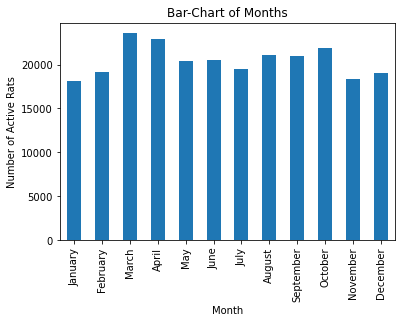

In [244]:
active_number_by_months = active_number_by_months[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]
active_number_by_months.plot(kind = "bar")

plt.xlabel("Month")
plt.ylabel("Number of Active Rats")
plt.title("Bar-Chart of Months");

axis_32 = plt.gca()

In [225]:
Active_time= Rodent_Active_date[["INSPECTION_DATE"]].copy()
Active_time

,INSPECTION_DATE
4,09/28/2020 01:07:05 PM
7,09/23/2020 10:44:22 AM
10,09/21/2020 08:53:14 AM
11,09/28/2020 03:08:05 PM
12,09/18/2020 09:46:55 AM
...,...
1916075,04/02/2021 10:30:52 AM
1916076,04/05/2021 09:51:54 AM
1916081,04/05/2021 10:06:54 AM
1916082,04/06/2021 02:49:31 PM


In [226]:
def extract_hour(entry):
    entry = str(entry)
    return entry.split(":")[0][-2:]


Active_time["Hour"] = Active_time["INSPECTION_DATE"].apply(extract_hour)
Active_time

,INSPECTION_DATE,Hour
4,09/28/2020 01:07:05 PM,01
7,09/23/2020 10:44:22 AM,10
10,09/21/2020 08:53:14 AM,08
11,09/28/2020 03:08:05 PM,03
12,09/18/2020 09:46:55 AM,09
...,...,...
1916075,04/02/2021 10:30:52 AM,10
1916076,04/05/2021 09:51:54 AM,09
1916081,04/05/2021 10:06:54 AM,10
1916082,04/06/2021 02:49:31 PM,02


In [231]:
Active_time.to_csv('Active_time.csv')


In [232]:
def extract_hour(entry):
    entry = str(entry)
    return entry.split(" ")[-1]

Active_time["AM/PM"] = Active_time["INSPECTION_DATE"].apply(extract_hour)
Active_time

,INSPECTION_DATE,Hour,AM/PM
4,09/28/2020 01:07:05 PM,01,PM
7,09/23/2020 10:44:22 AM,10,AM
10,09/21/2020 08:53:14 AM,08,AM
11,09/28/2020 03:08:05 PM,03,PM
12,09/18/2020 09:46:55 AM,09,AM
...,...,...,...
1916075,04/02/2021 10:30:52 AM,10,AM
1916076,04/05/2021 09:51:54 AM,09,AM
1916081,04/05/2021 10:06:54 AM,10,AM
1916082,04/06/2021 02:49:31 PM,02,PM


In [237]:
Active_time["ActiveHour"] = Active_time["Hour"] + Active_time["AM/PM"]
Active_time=Active_time["ActiveHour"]

In [278]:
Active_time.tolist

<bound method IndexOpsMixin.tolist of 4          01PM
7          10AM
10         08AM
11         03PM
12         09AM
           ... 
1916075    10AM
1916076    09AM
1916081    10AM
1916082    02PM
1916093    01PM
Name: ActiveHour, Length: 245577, dtype: object>

In [277]:
Active_time.value_counts()

11AM    42542
10AM    37259
12PM    34642
02PM    31363
03PM    30955
01PM    27028
09AM    18442
04PM    12686
08AM     8746
05PM      545
07AM      529
06PM      191
06AM      145
11PM      108
10PM      106
07PM       61
12AM       47
09PM       42
01AM       42
03AM       29
02AM       29
08PM       25
04AM       14
05AM        1
Name: ActiveHour, dtype: int64

In [276]:
Active_time.plot